In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [510]:
dados = pd.read_csv('olimpiadas.csv')
dados

,ano,edicao,cidade_sede,pais,delegacao,equipe,id_atleta,nome_atleta,sexo,idade,altura,peso,esporte,evento,medalha
0,1896,Summer,Athina,Australia,AUS,Australia,35698,"Edwin Harold ""Teddy"" Flack",M,22.0,NaN,NaN,Athletics,"Athletics Men's 1,500 metres",Gold
1,1896,Summer,Athina,Australia,AUS,Australia,35698,"Edwin Harold ""Teddy"" Flack",M,22.0,NaN,NaN,Athletics,Athletics Men's 800 metres,Gold
2,1896,Summer,Athina,Australia,AUS,Australia,35698,"Edwin Harold ""Teddy"" Flack",M,22.0,NaN,NaN,Athletics,Athletics Men's Marathon,NaN
3,1896,Summer,Athina,Australia,AUS,Australia/Great Britain,35698,"Edwin Harold ""Teddy"" Flack",M,22.0,NaN,NaN,Tennis,Tennis Men's Doubles,Bronze
4,1896,Summer,Athina,Australia,AUS,Australia,35698,"Edwin Harold ""Teddy"" Flack",M,22.0,NaN,NaN,Tennis,Tennis Men's Singles,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269713,2016,Summer,Rio de Janeiro,NaN,SGP,Singapore,133071,"Pei Lin ""Audrey"" Yong",F,21.0,156.0,50.0,Sailing,Sailing Women's Windsurfer,NaN
269714,2016,Summer,Rio de Janeiro,NaN,SGP,Singapore,133346,Yu Mengyu,F,26.0,166.0,50.0,Table Tennis,Table Tennis Women's Singles,NaN
269715,2016,Summer,Rio de Janeiro,NaN,SGP,Singapore,133346,Yu Mengyu,F,26.0,166.0,50.0,Table Tennis,Table Tennis Women's Team,NaN
269716,2016,Summer,Rio de Janeiro,NaN,SGP,Singapore,134826,Zhou Yihan,F,22.0,168.0,54.0,Table Tennis,Table Tennis Women's Team,NaN


## Tratamento da Base de Dados

**Trabalhando com dados nulos**

In [511]:
dados = dados.drop(dados.loc[(dados['pais'].isnull()) & (dados['medalha'].isnull())].index)

In [512]:
dados = dados.drop(dados.loc[(dados['idade'].isnull()) & (dados['medalha'].isnull())].index)

In [513]:
dados = dados.drop(dados.loc[(dados['altura'].isnull()) & (dados['medalha'].isnull())].index)

In [514]:
dados = dados.drop(dados.loc[(dados['peso'].isnull()) & (dados['medalha'].isnull())].index)

In [515]:
dados = dados.drop(dados.loc[(dados['medalha'].isnull())].index)

**Agrupando dados de países nulos**

In [516]:
dados[dados['pais'].isnull()].equipe.value_counts()

Singapore    9
Name: equipe, dtype: int64

In [517]:
dados.loc[dados['pais'].isnull(), 'pais'] = 'Others'

**Corrigindo dados nulos com suas médias**

In [518]:
media_idade = round(dados['idade'].mean())
media_altura = round(dados['altura'].mean())
media_peso = round(dados['peso'].mean())

In [519]:
dados.loc[dados['idade'].isnull(), 'idade'] = media_idade
dados.loc[dados['altura'].isnull(), 'altura'] = media_altura
dados.loc[dados['peso'].isnull(), 'peso'] = media_peso

In [520]:
dados.isnull().sum()

ano            0
edicao         0
cidade_sede    0
pais           0
delegacao      0
equipe         0
id_atleta      0
nome_atleta    0
sexo           0
idade          0
altura         0
peso           0
esporte        0
evento         0
medalha        0
dtype: int64

In [521]:
dados.reset_index(inplace=True)

## Análise dos Dados

**Dos 10 países com mais medalhas, quantos tem mais medalhas de ouro?**

In [522]:
top10 = list(dados[['pais','medalha']].pais.value_counts().head(10).index)
top10

['USA',
 'Russia',
 'Germany',
 'UK',
 'France',
 'Italy',
 'Sweden',
 'Canada',
 'Australia',
 'Hungary']

In [523]:
medalhas = list(dados[['pais','medalha']].pais.value_counts().head(10).values)
medalhas

[5637, 3947, 3756, 2067, 1767, 1637, 1536, 1352, 1349, 1135]

In [524]:
ouros = []
for i in top10:
    a = dados.loc[(dados.pais == i) & (dados.medalha == 'Gold')].pais.count()
    ouros.append(a)
print(ouros)

[2638, 1599, 1301, 677, 499, 575, 479, 463, 368, 432]


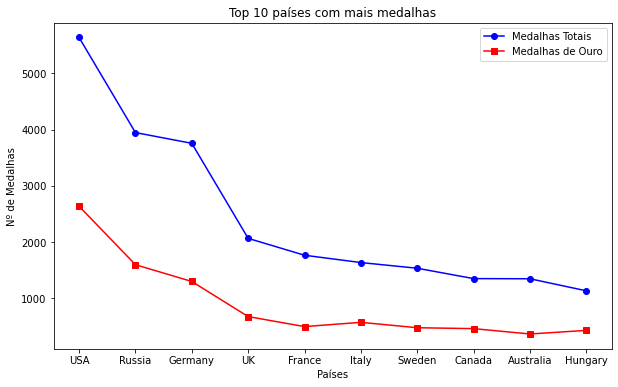

In [525]:
plt.figure(figsize=(10,6))
plt.plot(top10, medalhas, label='Medalhas Totais',color='blue', marker='o')
plt.plot(top10, ouros, label='Medalhas de Ouro', color='red', marker='s')
plt.title('Top 10 países com mais medalhas', size=12)
plt.xlabel('Países')
plt.ylabel('Nº de Medalhas')
plt.legend()
plt.show()

In [526]:
num_medalhas = dict(zip(top10, medalhas))
num_ouro = dict(zip(top10, ouros))

In [527]:
print('Número Total de Medalhas dos Países do Top 10')
for pais, num in num_medalhas.items():
    print(f'{pais} = {num} Medalhas')

print()

print('Número de Medalhas de Ouro dos Países do Top 10')
for pais, num in num_ouro.items():
    print(f'{pais} = {num} Ouros')

Número Total de Medalhas dos Países do Top 10
USA = 5637 Medalhas
Russia = 3947 Medalhas
Germany = 3756 Medalhas
UK = 2067 Medalhas
France = 1767 Medalhas
Italy = 1637 Medalhas
Sweden = 1536 Medalhas
Canada = 1352 Medalhas
Australia = 1349 Medalhas
Hungary = 1135 Medalhas

Número de Medalhas de Ouro dos Países do Top 10
USA = 2638 Ouros
Russia = 1599 Ouros
Germany = 1301 Ouros
UK = 677 Ouros
France = 499 Ouros
Italy = 575 Ouros
Sweden = 479 Ouros
Canada = 463 Ouros
Australia = 368 Ouros
Hungary = 432 Ouros


**Quantas medalhas tem o Brasil e quantas são de ouro?**

In [528]:
brasil = dados.loc[dados.pais == 'Brazil']
brasil = brasil.copy()
brasil.head()

,index,ano,edicao,cidade_sede,pais,delegacao,equipe,id_atleta,nome_atleta,sexo,idade,altura,peso,esporte,evento,medalha
3647,12959,1920,Summer,Antwerpen,Brazil,BRA,Brazil,7767,Dario Barbosa,M,37.0,178.0,74.0,Shooting,"Shooting Men's Free Pistol, 50 metres, Team",Bronze
3648,12961,1920,Summer,Antwerpen,Brazil,BRA,Brazil,24637,Afrnio Antnio da Costa,M,28.0,178.0,74.0,Shooting,"Shooting Men's Free Pistol, 50 metres",Silver
3649,12962,1920,Summer,Antwerpen,Brazil,BRA,Brazil,24637,Afrnio Antnio da Costa,M,28.0,178.0,74.0,Shooting,"Shooting Men's Free Pistol, 50 metres, Team",Bronze
3650,12975,1920,Summer,Antwerpen,Brazil,BRA,Brazil,91332,Guilherme Paraense,M,35.0,178.0,74.0,Shooting,"Shooting Men's Free Pistol, 50 metres, Team",Bronze
3651,12976,1920,Summer,Antwerpen,Brazil,BRA,Brazil,91332,Guilherme Paraense,M,35.0,178.0,74.0,Shooting,"Shooting Men's Military Pistol, 30 metres",Gold


In [529]:
brasil.loc[:, 'medalha'] = brasil['medalha'].map({'Bronze': 'Bronze', 'Silver': 'Prata', 'Gold': 'Ouro'})

In [530]:
medalhas_br = brasil.medalha
print(f'O Brasil tem {medalhas_br.count()} medalhas no total')

O Brasil tem 475 medalhas no total


In [531]:
medalhas_br.value_counts()

Bronze    191
Prata     175
Ouro      109
Name: medalha, dtype: int64

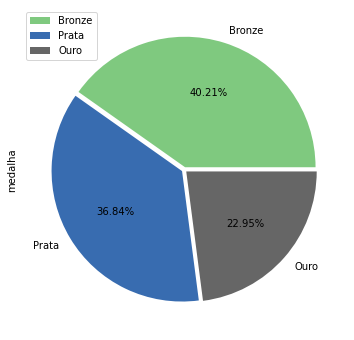

In [532]:
medalhas_br.value_counts().plot(kind='pie', autopct='%1.2f%%', colormap='Accent', figsize=(8,6), explode=[0.02,0.02,0.02])
plt.legend(loc='upper left')
plt.show()

**Em qual modalidade o Brasil tem mais atletas medalhistas?**

In [597]:
medalhas_br = brasil[['evento','medalha']].groupby('evento').count().sort_values(by='medalha', ascending=False).head(10)

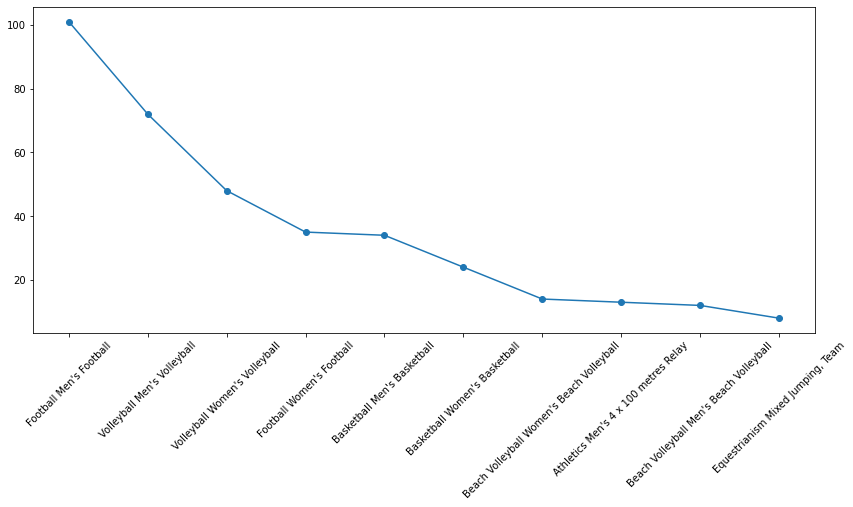

In [603]:
plt.figure(figsize=(14,6))
plt.plot(medalhas_br, marker='o')
plt.xticks(rotation=45)
plt.show()

**Atletas com mais medalhas de ouro no Brasil**

In [701]:
br_atletas = list(brasil.loc[brasil.medalha == 'Ouro'].nome_atleta.value_counts().head(13).index)

In [695]:
esporte = []

for i in br_atletas:
    valor = brasil.loc[brasil.nome_atleta == i].evento.values[0]
    esporte.append(valor)

In [703]:
dicionario = dict(zip(br_atletas, esporte))
dicionario

{'Maurcio Camargo Lima': "Volleyball Men's Volleyball",
 'Jaqueline Maria "Jaque" Pereira de Carvalho Endres': "Volleyball Women's Volleyball",
 'Robert Scheidt': 'Sailing Mixed One Person Dinghy',
 'Torben Schmidt Grael': 'Sailing Mixed Three Person Keelboat',
 'Marcelo Bastos Ferreira': 'Sailing Mixed Two Person Keelboat',
 'Fabiana "Fabi" Alvim de Oliveira': "Volleyball Women's Volleyball",
 'Fabiana Marcelino Claudino': "Volleyball Women's Volleyball",
 'Giovane Farinazzo Gvio': "Volleyball Men's Volleyball",
 'Srgio "Escadinha" Dutra dos Santos': "Volleyball Men's Volleyball",
 'Thasa Daher de Menezes': "Volleyball Women's Volleyball",
 'Paula Renata Marques Pequeno': "Volleyball Women's Volleyball",
 'Adhemar Ferreira da Silva': "Athletics Men's Triple Jump",
 'Sheilla Tavares de Castro Blassioli': "Volleyball Women's Volleyball"}